# Assay Annotations
This notebook explores the annotation data for a given set of assays from PubChem. 

Run `pubchem_assay_annotations.py` BEFORE using this notebook to get the required input file (assay ids with annotation info).

In [39]:
# run pubchem_assay_annotations.py to generate this file
ANNOTATIONS_JSON_FILE = "/media/jack/big_disk/data/badapple/assay_annotations_tested.json"

## Setup

In [40]:
import json
import matplotlib.pyplot as plt
from collections import Counter

In [41]:
# load data
with open(ANNOTATIONS_JSON_FILE, "r") as f:
    ann_data = json.load(f)

## Visualizing annotations from BARD

TODO: may want to try to incorporate other data sources, but if using multiple sources need a way to standardize terms 

In [42]:
def get_source_ref_num(aid_ref_list: list[dict], source: str) -> int:
    for ref in aid_ref_list:
        if "SourceName" in ref and ref["SourceName"] == source:
            return ref["ReferenceNumber"]
    return -1

In [43]:
BARD_sourcename = "BioAssay Research Database (BARD)"
aid_2_bardrefnum = {}
for aid in ann_data["References"]:
    aid_2_bardrefnum[aid] = get_source_ref_num(ann_data["References"][aid], BARD_sourcename)

In [44]:
# for each annotation type (Assay Format, Assay Type, etc)
# store a list of all the terms
bard_annotations = {}
for aid, ref_n in aid_2_bardrefnum.items():
    if ref_n == -1:
        continue # skip over entries that don't tie to BARD
    aid_annotations = ann_data["Annotations"][aid]
    for annotation in aid_annotations:
        if annotation["ReferenceNumber"] == ref_n:
            ann_name = annotation["Name"]
            ann_val = annotation["Value"]
            if ann_name in bard_annotations:
                bard_annotations[ann_name].append(ann_val)
            else:
                bard_annotations[ann_name] = [ann_val]

In [45]:
bard_annotations.keys()

dict_keys(['Assay Format', 'Assay Type', 'Detection Method'])

In [46]:
def plot_term_counts(d: dict[str, list[str]], key: str):
    term_counts = Counter(d[key])
    sorted_term_counts = dict(sorted(term_counts.items()))
    labels = list(sorted_term_counts.keys())
    frequencies = list(sorted_term_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(labels, frequencies, color='skyblue')

    plt.xlabel('Terms')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {key} Terms')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

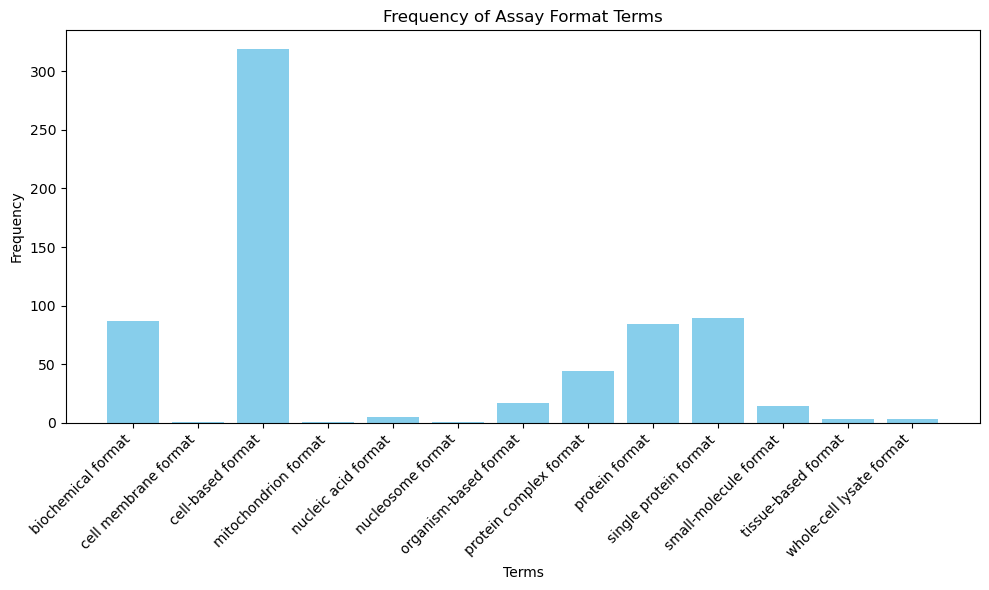

In [47]:
plot_term_counts(bard_annotations, 'Assay Format')

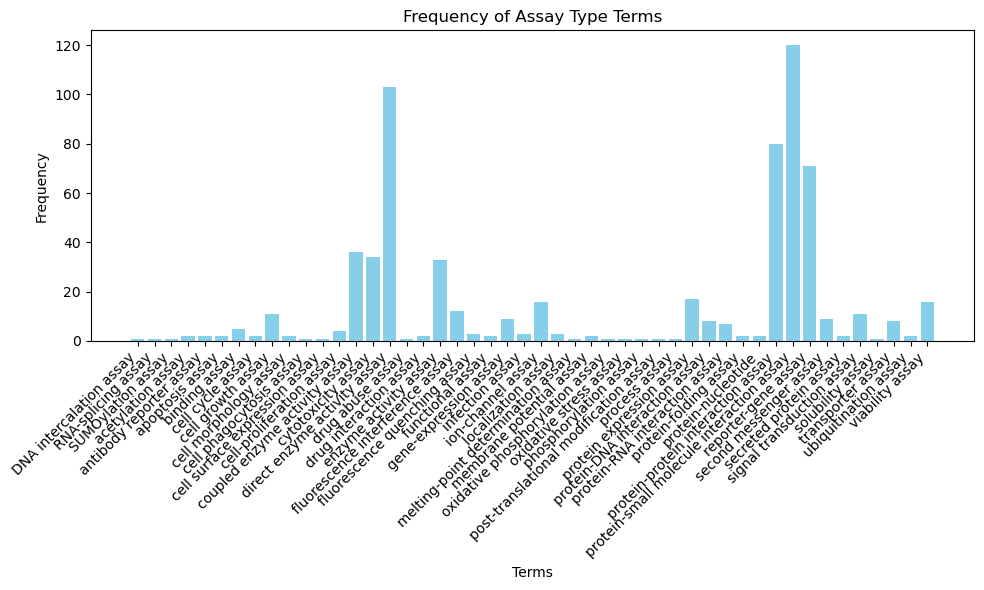

In [48]:
plot_term_counts(bard_annotations, 'Assay Type')

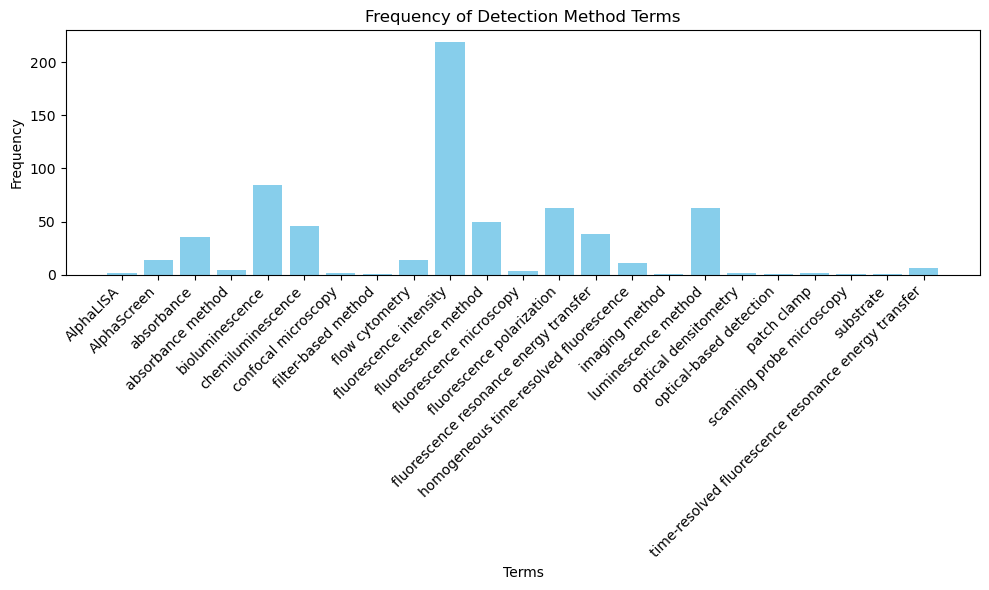

In [49]:
plot_term_counts(bard_annotations, 'Detection Method')